In [885]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

real_estate_df=pd.read_csv('real_estate_data.csv')

In [886]:
year = real_estate_df['year']
bed = real_estate_df['bed']
bath = real_estate_df['bath']
sqft = real_estate_df['sqft']

Regression with year

coefficients 	 [979.45641452]
intercept 	 -1660782.5120351715
R^2 value 	 0.020152832542723487
residuals 
 0      -20093.147588
1        4543.703562
2      -76219.445288
3      -30442.706801
4     -144959.014366
           ...      
495   -117494.665682
496     60080.554712
497    -62130.316998
498    -65519.445288
499     44257.293199
Name: price, Length: 500, dtype: float64


Text(0.5, 1.0, 'Year vs Price')

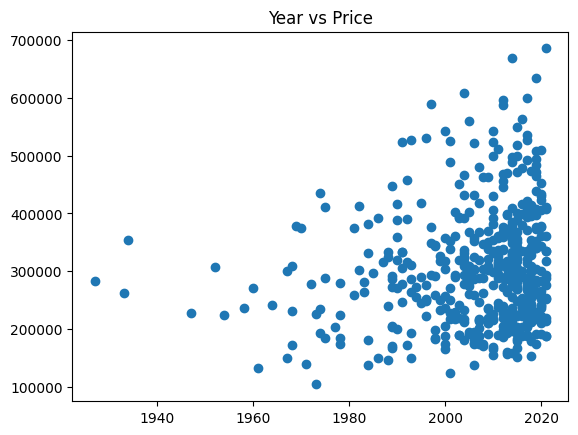

In [887]:
X = np.array([year]).T
price = real_estate_df['price']

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)
print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

plt.scatter(year, price)
plt.title('Year vs Price')

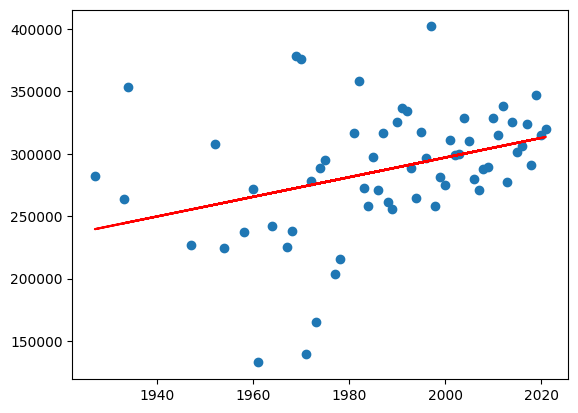

In [888]:
years = year.unique()
avg = []
for x in years:
  temp = real_estate_df[real_estate_df['year']==x]
  temp = temp['price']
  len = temp.size
  sum = temp.sum()
  temp_avg = sum / len
  avg.append(temp_avg)
data = np.array([years, avg]).T
myFrame = pd.DataFrame(data, columns=['year', 'price'])

regression = np.polyfit(years, avg, 1)
model = np.poly1d(regression)

res = avg-model(years)
plt.scatter(years, avg)
plt.plot(years, model(years), color='red')

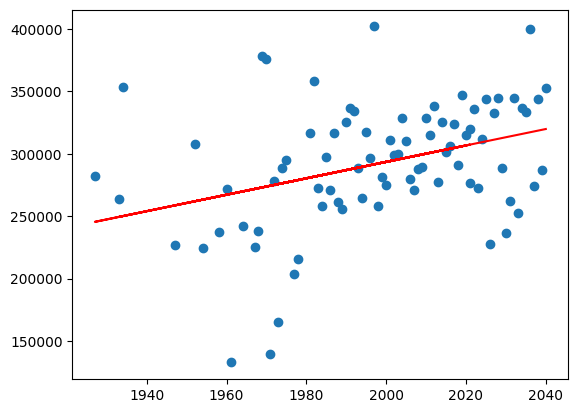

In [889]:
# generating data for the future
max= 2021
dev = np.std(res)
Y_temp = []
price_temp = []
for i in range(20):
  year = max + i
  price_pred = model(year)
  bias = np.random.randn()
  price_bias = price_pred+bias*dev
  Y_temp.append(year)
  price_temp.append(price_bias)

years = np.append(years, Y_temp)
avg = np.append(avg, price_temp)

regression = np.polyfit(years, avg, 1)
model = np.poly1d(regression)

res = avg-model(years)
plt.scatter(years, avg)
plt.plot(years, model(years), color='red')

Regression with bed

In [890]:
X = np.array([bed]).T

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

coefficients 	 [103525.72153251]
intercept 	 1137.0359097592882
R^2 value 	 0.7933732361194773
residuals 
 0     -74814.200507
1     -19814.200507
2      33311.521025
3     -30314.200507
4     -70688.478975
           ...     
495   -35388.478975
496    66085.799493
497   -75714.200507
498    44011.521025
499    44385.799493
Name: price, Length: 500, dtype: float64


Regression with bath

In [891]:
X = np.array([bath]).T

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

coefficients 	 [170380.05206356]
intercept 	 33733.497271008615
R^2 value 	 0.6270283029800351
residuals 
 0      -52403.575366
1        2596.424634
2       37386.450665
3       -7903.575366
4     -151803.575366
           ...      
495   -116503.575366
496     88496.424634
497    -53303.575366
498    -37103.575366
499     66796.424634
Name: price, Length: 500, dtype: float64


Regression with sqft

coefficients 	 [104.32339894]
intercept 	 13256.977723349992
R^2 value 	 0.8997967727565468
residuals 
 0     -100802.748435
1      -46845.982425
2       18552.990402
3       -8313.984922
4      -35371.778106
           ...      
495    -14677.053958
496     36967.549597
497    -16157.561302
498     25080.054444
499     21526.953533
Name: price, Length: 500, dtype: float64


Text(0.5, 1.0, 'Sqft vs Price')

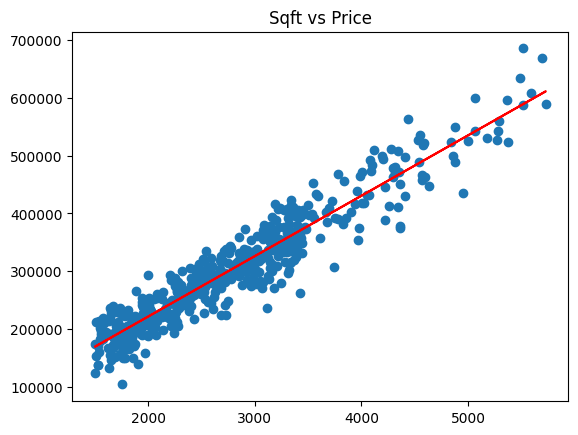

In [892]:
X = np.array([sqft]).T

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

plt.scatter(sqft, price)
plt.plot(sqft, model, c='r')
plt.title('Sqft vs Price')

Regression with all 4 predictor variables

In [893]:
x1 = real_estate_df['year']
x2 = real_estate_df['bed']
x3 = real_estate_df['bath']
x4 = real_estate_df['sqft']
X = np.array([x1, x2, x3, x4]).T
price = real_estate_df['price']

regression = LinearRegression()
regression.fit(X, price)
model = regression.predict(X)

print('coefficients \t',regression.coef_)
print('intercept \t',regression.intercept_)
print('R^2 value \t',regression.score(X,price))
print('residuals \n',price-model)

coefficients 	 [ 1553.15847504 12022.60289912  8760.30619558    92.24865144]
intercept 	 -3118549.5690480634
R^2 value 	 0.951983388675247
residuals 
 0     -21736.299041
1     -15806.698281
2       4444.148083
3     -21778.793983
4      -3742.947224
           ...     
495     6216.973774
496    20100.415964
497   -12225.060815
498     7074.048928
499    13254.285900
Name: price, Length: 500, dtype: float64


Prices/sqrft of the real estate by numbers bedrooms

In [894]:
bed_dict = {}

for x in real_estate_df['year']:
  a = real_estate_df[real_estate_df['year']==x]
  beds = a['bed'].unique()
  temp_bed = []
  temp_price = []
  for bed in beds:
    filtered = a[a['bed']==bed]
    sum_price = filtered['price'].sum()
    sum_feet = filtered['sqft'].sum()
    cur_price = sum_price / sum_feet
    temp_bed.append(bed)
    temp_price.append(cur_price)
  prices = dict(zip(temp_bed, temp_price))
  bed_dict[x] = prices 


In [895]:
deux = []
trois = []
quatro = []
cinq = []
year = []

for i in sorted(bed_dict.keys()):
  year.append(i)
  value = bed_dict[i]
  try:
    price = value[2]
    deux.append(price)
  except Exception:
    deux.append(np.nan)
  try:
    price = value[3]
    trois.append(price)
  except Exception:
    trois.append(np.nan)
  try:
    price = value[4]
    quatro.append(price)
  except Exception:
    quatro.append(np.nan)
  try:
    price = value[5]
    cinq.append(price)
  except Exception:
    cinq.append(np.nan)


Text(0.5, 1.0, '2 Bedrooms vs year')

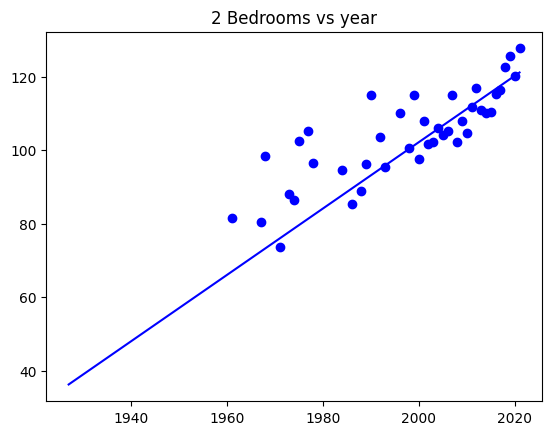

In [896]:
Z = np.array(year)

def myRegression(data):
  longest = 0
  index = 0
  cur_longest = 0
  cur_index = 0
  counting = False
  for i in range(Z.shape[0]):
    if data[i]>0:
      if counting == False:
        cur_index = i
      cur_longest += 1
      counting = True
      if i == Z.shape[0]-1:
        if cur_longest > longest:
          index = cur_index
          longest = cur_longest
    else:
      if counting == True:
        counting = False
        if cur_longest > longest:
          index = cur_index
          longest = cur_longest
        cur_longest = 0
        cur_index = 0
  years = year[index:index+longest]
  p = data[index: index+longest]
  regression = np.polyfit(years, p, 1)
  model = np.poly1d(regression)
  return model


model1 = myRegression(deux)
model2 = myRegression(trois)
model3 = myRegression(quatro)
model4 = myRegression(cinq)
plt.scatter(year, deux, c='blue')

# plt.plot(year, quatro, c='red')
# plt.plot(year, cinq, c='purple')
plt.plot(year, model1(year), c='blue')
# plt.plot(year, model2(year), c='orange')
# plt.plot(year, model3(year), c='red')
# plt.plot(year, model4(year), c='purple')
# plt.legend(['2 bedrooms', '3 bedrooms', '4 bedrooms', '5 bedrooms'])
plt.title("2 Bedrooms vs year")

Text(0.5, 1.0, '3 Bedrooms vs year')

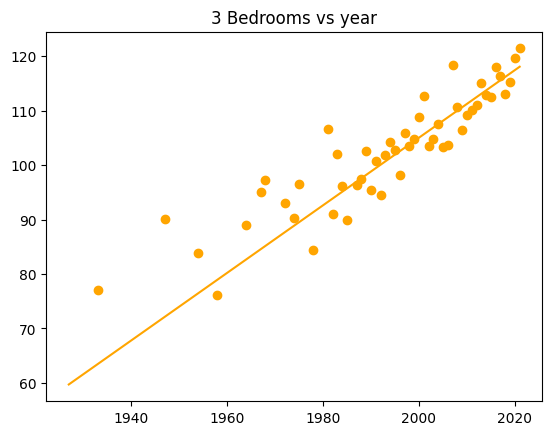

In [897]:
plt.scatter(year, trois, c='orange')
plt.plot(year, model2(year), c='orange')
plt.title("3 Bedrooms vs year")


Text(0.5, 1.0, '4 Bedrooms vs year')

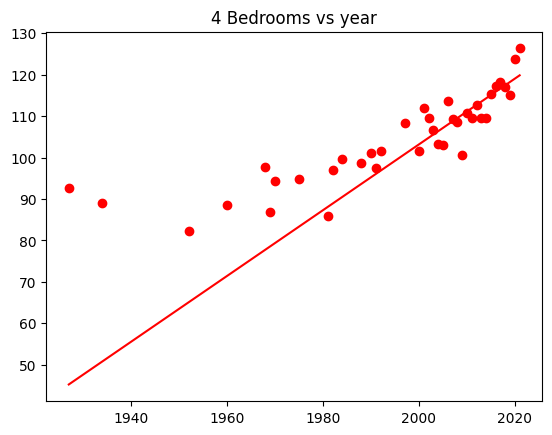

In [898]:
plt.scatter(year, quatro, c='red')
plt.plot(year, model3(year), c='red')
plt.title("4 Bedrooms vs year")

Text(0.5, 1.0, '5 bedrooms vs year')

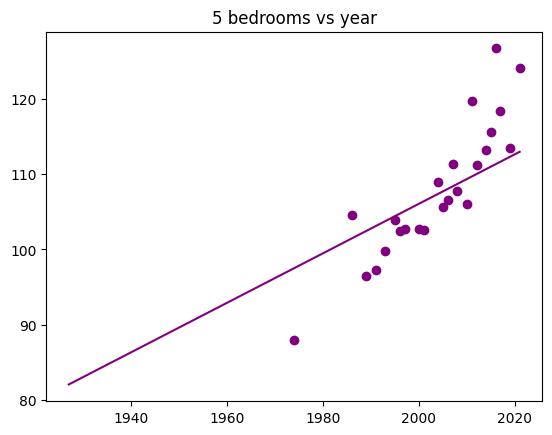

In [899]:
plt.scatter(year, cinq, c='purple')
plt.plot(year, model4(year), c='purple')
plt.title("5 bedrooms vs year")

price/sqrft of the real esstate by numbers of bathrooms

In [900]:
baths_dict = {}

for x in real_estate_df['year']:
  a = real_estate_df[real_estate_df['year']==x]
  baths = a['bath'].unique()
  temp_bath = []
  temp_price = []
  for bath in baths:
    filtered = a[a['bath']==bath]
    sum_price = filtered['price'].sum()
    sum_feet = filtered['sqft'].sum()
    cur_price = sum_price / sum_feet
    temp_bath.append(bath)
    temp_price.append(cur_price)
  prices = dict(zip(temp_bath, temp_price))
  baths_dict[x] = prices


In [901]:
odin = []
dva = []
tri = []
chet = []
piat = []


for i in sorted(baths_dict.keys()):
  value = baths_dict[i]
  try:
    price = value[1.0]
    odin.append(price)
  except Exception:
    odin.append(np.nan)
  try:
    price = value[1.5]
    dva.append(price)
  except Exception:
    dva.append(np.nan)
  try:
    price = value[2.0]
    tri.append(price)
  except Exception:
    tri.append(np.nan)
  try:
    price = value[2.5]
    chet.append(price)
  except Exception:
    chet.append(np.nan)
  try:
    price = value[3.0]
    piat.append(price)
  except Exception:
    piat.append(np.nan)


# plt.plot(year, odin, c='blue')
# plt.plot(year, dva, c='orange')
# plt.plot(year, tri, c='red', )
# plt.plot(year, chet, c='green')
# plt.plot(year, piat, c='purple')
# plt.ylabel("Price/sqft")
# plt.xlabel("Year")
# plt.legend(['1.0', '1.5', '2.0', '2.5', '3.0'])
# plt.show()


Text(0.5, 1.0, '1 Bathroom vs Year')

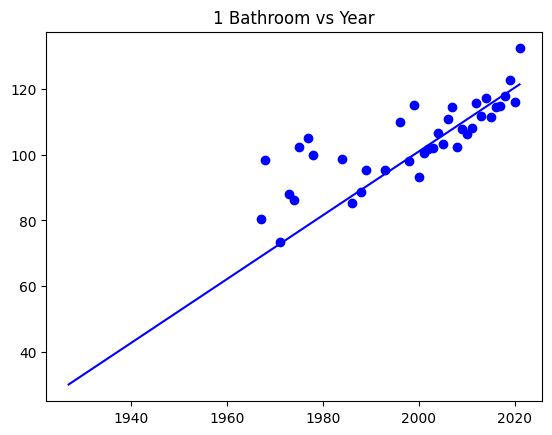

In [902]:
model1 = myRegression(odin)
model2 = myRegression(dva)
model3 = myRegression(tri)
model4 = myRegression(chet)
model5 = myRegression(piat)
plt.scatter(year, odin, c='blue')
plt.plot(year, model1(year), c='blue')

plt.title("1 Bathroom vs Year")

[1927, 1933, 1934, 1947, 1952, 1954, 1958, 1960, 1961, 1964, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1977, 1978, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


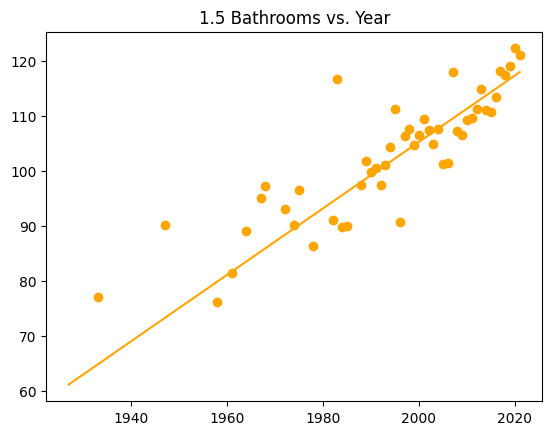

In [903]:
plt.scatter(year, dva, c='orange')
plt.plot(year, model2(year), c='orange')
plt.title('1.5 Bathrooms vs. Year')
print(year)

Text(0.5, 1.0, '2 Bathrooms vs. Year')

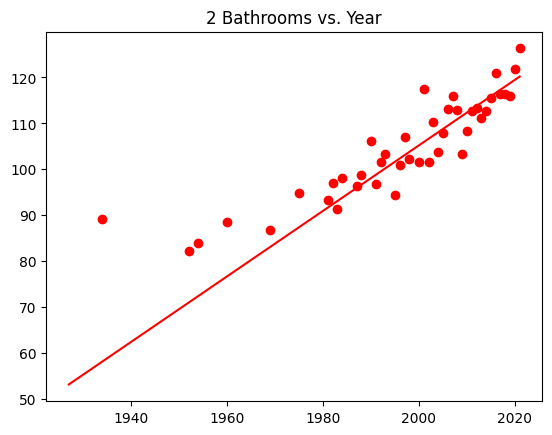

In [904]:
plt.scatter(year, tri, c='red')
plt.plot(year, model3(year), c='red')
plt.title('2 Bathrooms vs. Year')

Text(0.5, 1.0, '2.5 Bathrooms vs. Year')

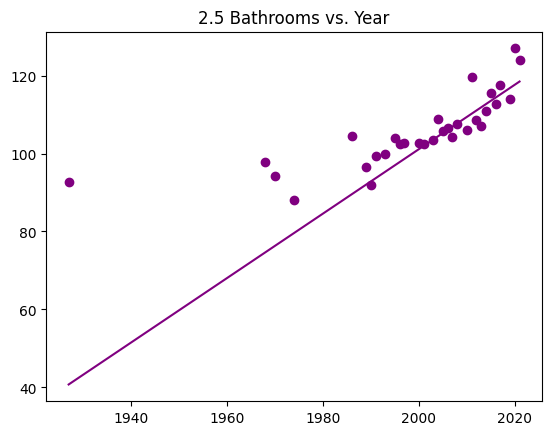

In [905]:
plt.scatter(year, chet, c='purple')
plt.plot(year, model4(year), c='purple')
plt.title('2.5 Bathrooms vs. Year')

Text(0.5, 1.0, '3 bathrooms vs year')

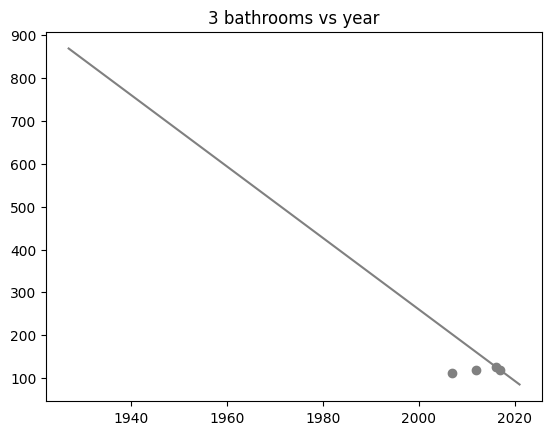

In [906]:
plt.scatter(year, piat, c='grey')
plt.plot(year, model5(year), c='grey')
plt.title("3 bathrooms vs year")